# **Hands-on Assignment 8: Cumulative Review**

##**Introduction**
By now, you have extensively used the data from the Digitalis Investigation Group (DIG) Trial for learning data cleaning, data manipulation, data visualization, and biostatistics. With the introductions of the above staistical methods, you are ready to publish a complete mock analysis.


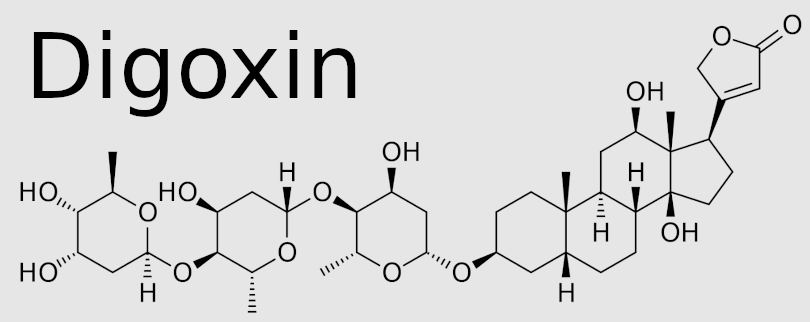

For more information, you may refer to a comprehensive description of this dataset here:

https://biolincc.nhlbi.nih.gov/media/teachingstudies/digdoc.pdf?link_time=2022-09-20_07:24:09.208947

##**Instructions**

In your own Colab notebook, use the concepts presented in the previous assignments to complete a mock analysis of the DIG data. You must start with the uncleaned dataset and perform data cleaning, data visualization, basic biostatistical anlysis, and then publish it on GitHub. You will be graded based whether all four components are present and published in an organized, documented fashion on GitHub that approximately follows this structure below.

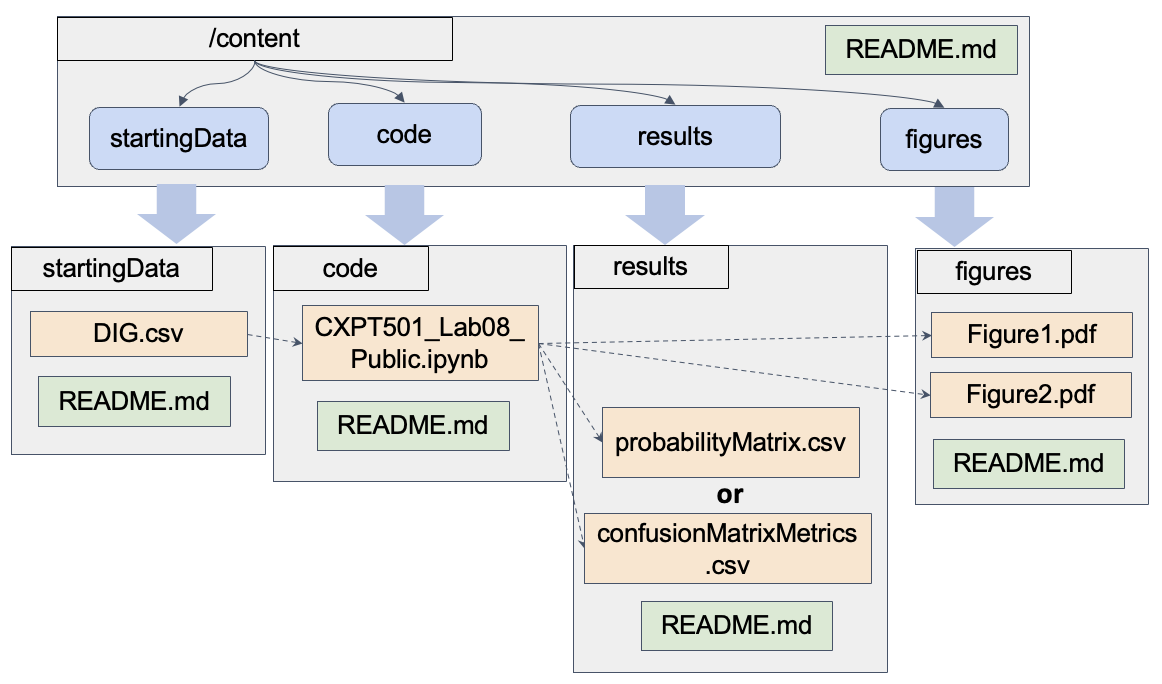

This will be similar to your Final Project in which you will analyze your own dataset with biostatistical methods that will be introduced later in the course.

Thirdly, you **must** include a link to your **public** GitHub repository here:


<font color='red'>Add the link to your GitHub repo here.</font>

https://github.com/jul1an-o/CXPT501_Assignment_08/tree/main

##**Steps**

Write the code for your analysis here. You must add comments with text boxes to improve your code's readability.

# Git Setup

## Git Key DO NOT RERUN

In [1]:
%%bash

#THIS IS THE KEY do not run multiple times
cd /content

ssh-keygen -t ed25519 -C '[jolea@usc.edu]' -f ~/.ssh/id_ed25519 -P ''
cat > ~/.ssh/config
Host *
  AddKeysToAgent yes
  IdentityFile ~/.ssh/id_ed25519

Generating public/private ed25519 key pair.
Your identification has been saved in /root/.ssh/id_ed25519
Your public key has been saved in /root/.ssh/id_ed25519.pub
The key fingerprint is:
SHA256:vkT+wqHePnLIV6FRPQqg6E/oMRfgFuZ3PCT/1im/P2w [jolea@usc.edu]
The key's randomart image is:
+--[ED25519 256]--+
|  + . o.   .     |
| + + *  . . o    |
|  = + =  o . .   |
| o o o o..o.     |
|  = o   Soo.     |
| . *   =oo.      |
|  . .. ++o..     |
|      =o*o .E    |
|     ..=+ooo..   |
+----[SHA256]-----+


Created directory '/root/.ssh'.


In [2]:
%%bash
eval "$(ssh-agent -s)"
ssh-add ~/.ssh/id_ed25519

Agent pid 475


Identity added: /root/.ssh/id_ed25519 ([jolea@usc.edu])


In [3]:
%%bash

#THIS IS THE PART WHERE YOU GO BACK TO GITHUB TO ENTER THE SSH KEY
cat ~/.ssh/id_ed25519.pub

ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAIEnokcXDKfap448kQVKrUiFwqDvI2HU1dBpuJQgEHebQ [jolea@usc.edu]


In [4]:
%%bash
ssh -o "StrictHostKeyChecking no" -T git@github.com | exit 0

Hi jul1an-o! You've successfully authenticated, but GitHub does not provide shell access.


## Git Config

In [5]:
%%bash

#Configure the git profile
git config --global user.email "jolea@usc.edu"
git config --global user.name "Julian Olea"

git init

#Remotely link to the existing repository and establish a local branch 'main'
git remote add origin git@github.com:jul1an-o/CXPT501_Assignment_08.git
git branch -M main

Initialized empty Git repository in /content/.git/


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>


# Analysis

In [6]:
#Import all the necessary libraries for analysis

import pandas
import numpy
import scipy.stats as stats
import random
import seaborn
import matplotlib

## Generating the File Hierarchy

In [7]:
%%bash

#Organize the directories for saving the files
rm -f -r sample_data

#Generate an empty README.md in the root directory
touch README.md

#Generate the subdirectories
mkdir -p startingData code results figures

#Generate the .gitignore file with its contents
cat > .gitignore
.*
.gitignore

In [8]:
%%bash

#Edit the root README.md file
cat > README.md
All relevant subfolders pertinent to the analysis.
Code: Contains the .ipynb file used to generate this analysis
Figures: Contains the two plots generated by this analysis
Results: Contains the cleaned dataset
startingData: Contains the raw dataset

In [9]:
%%bash

#Edit the README.md file in the code folder
cat > /content/code/README.md
This folder contains the .ipynb file used to gnerate the analysis

In [10]:
%%bash

#Edit the README.md files in the figure folder
cat > /content/figures/README.md
This folder contains the the two plots generated by the analysis.
The first plot, plot1.pdf, is a histogram showing the distribution of BMI in this dataset.
The second plot, plot2.pdf, is a violin Plot of BMI stratified by Digoxin dosagee and split by death status

In [11]:
%%bash

#Edit the README.md file in the results folder
cat > /content/results/README.md
This folder contains the cleaned dataset: cleaned_data.csv

In [12]:
%%bash

#Edit the README.md file in the startingData folder
cat > /content/startingData/README.md
This folder contains the raw dataset: raw_data.csv

##**Data Cleaning & Manipulation**

In [13]:
#Import the raw data
df = pandas.read_csv("https://drive.google.com/uc?export=download&id=1M0ZFQ09JPZGPm0cVJ0gXwENSgwf84cd2")

#Export the raw data
df.to_csv("/content/startingData/raw_data.csv")

df.head()

,ID,TRTMT,AGE,RACE,SEX,EJF_PER,EJFMETH,CHESTX,BMI,KLEVEL,...,OTH,OTHDAYS,HOSP,HOSPDAYS,NHOSP,DEATH,DEATHDAY,REASON,DWHF,DWHFDAYS
0,1,0,66,1,1,40,2,0.50,20.073,NaN,...,1,533,1,533,6,0,1438,NaN,1,1379
1,2,0,77,1,1,12,1,0.56,20.701,3.1,...,1,880,1,468,4,1,1360,1.0,1,1329
2,3,0,72,1,2,36,1,0.68,25.530,5.1,...,0,1391,1,631,2,0,1391,NaN,1,631
3,4,1,57,1,1,31,1,0.48,25.794,NaN,...,0,1157,0,1157,0,0,1157,NaN,0,1157
4,5,0,74,1,1,15,1,0.53,25.654,4.0,...,1,459,1,191,5,0,1550,NaN,1,191


In [14]:
#Check which columns have NaN Values

#for col in df:
    #print(col, df[col].unique())

df.columns[df.isna().any()].tolist()

['CHESTX',
 'BMI',
 'KLEVEL',
 'CHFDUR',
 'RALES',
 'ELEVJVP',
 'PEDEMA',
 'RESTDYS',
 'EXERTDYS',
 'ACTLIMIT',
 'S3',
 'PULCONG',
 'HEARTRTE',
 'DIABP',
 'SYSBP',
 'FUNCTCLS',
 'CHFETIOL',
 'PREVMI',
 'ANGINA',
 'HYPERTEN',
 'DIURET',
 'KSUPP',
 'VASOD',
 'DIGDOSE',
 'REASON']

In [16]:
#Define a subset of columns for Analysis
interestcols = ['AGE', 'RACE', 'SEX', 'DIABETES', 'HYPERTEN', 'DIGDOSE', 'CVD', 'DIG', 'HOSP', 'NHOSP', 'DEATH', 'BMI']
dfinterest = df[interestcols]

#Exclude the rows with NaN values
subsetcols = ['BMI', 'HYPERTEN', 'DIGDOSE']
dfcleaned = dfinterest.dropna(subset=subsetcols)

dfcleaned.head()

,AGE,RACE,SEX,DIABETES,HYPERTEN,DIGDOSE,CVD,DIG,HOSP,NHOSP,DEATH,BMI
0,66,1,1,1,0.0,0.250,1,0,1,6,0,20.073
1,77,1,1,0,1.0,0.250,1,0,1,4,1,20.701
2,72,1,2,0,1.0,0.250,1,0,1,2,0,25.530
3,57,1,1,0,1.0,0.250,0,0,0,0,0,25.794
4,74,1,1,0,0.0,0.375,1,0,1,5,0,25.654


In [17]:
#Check which remaining columns have NaN Values
dfcleaned.columns[dfcleaned.isna().any()].tolist()

[]

In [18]:
#Generate a copy of the cleaned dataset
dfcleanedfinal = dfcleaned.copy()

#Subset the Digoxin doses
dosesubset = [0.0, 0.125, 0.25, 0.375, 0.5]
dfcleanedfinal = dfcleanedfinal.loc[dfcleanedfinal['DIGDOSE'].isin(dosesubset)]

#Exclude the Outliers (3 standard deviations from the mean)
dfcleanedfinal['stdFromMean'] = (dfcleanedfinal['BMI'] - dfcleanedfinal['BMI'].mean()) / dfcleanedfinal['BMI'].std()
stdOutliers = dfcleanedfinal['BMI'].loc[(dfcleanedfinal['stdFromMean'] < -3) | (dfcleanedfinal['stdFromMean'] > 3)]
dfcleanedfinal['BMI'].drop(stdOutliers.index)

#Generate a new column 'DEATH_RECODE' which annotates the death coding
dfcleanedfinal.loc[(dfcleanedfinal['DEATH'] == 0), 'DEATH_RECODE'] = 'ALIVE'
dfcleanedfinal.loc[(dfcleanedfinal['DEATH'] == 1), 'DEATH_RECODE'] = 'DIED'

#Export the cleaned data
dfcleanedfinal.to_csv("/content/results/cleaned_data.csv")

dfcleanedfinal.head()

,AGE,RACE,SEX,DIABETES,HYPERTEN,DIGDOSE,CVD,DIG,HOSP,NHOSP,DEATH,BMI,stdFromMean,DEATH_RECODE
0,66,1,1,1,0.0,0.250,1,0,1,6,0,20.073,-1.355822,ALIVE
1,77,1,1,0,1.0,0.250,1,0,1,4,1,20.701,-1.234912,DIED
2,72,1,2,0,1.0,0.250,1,0,1,2,0,25.530,-0.305176,ALIVE
3,57,1,1,0,1.0,0.250,0,0,0,0,0,25.794,-0.254347,ALIVE
4,74,1,1,0,0.0,0.375,1,0,1,5,0,25.654,-0.281302,ALIVE


##**Data Visualization**

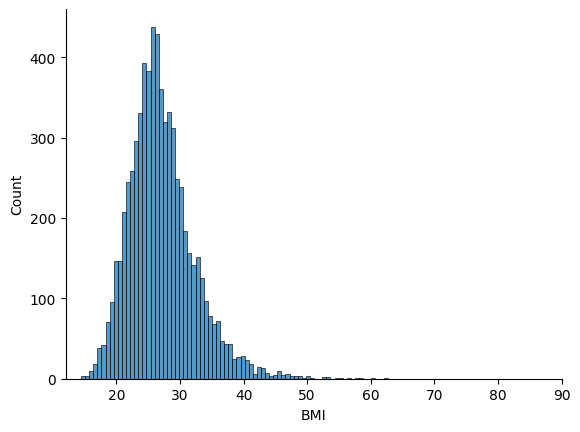

In [19]:
#Plot 1 - Distribution of BMI
plot1 = seaborn.histplot(data = dfcleanedfinal, x = 'BMI')
plot1.set(xlabel = 'BMI', ylabel = 'Count')
plot1.set_xticks(list(range(20, 91, 10)))
seaborn.despine()
matplotlib.pyplot.savefig("/content/figures/plot1.pdf", bbox_inches = 'tight')

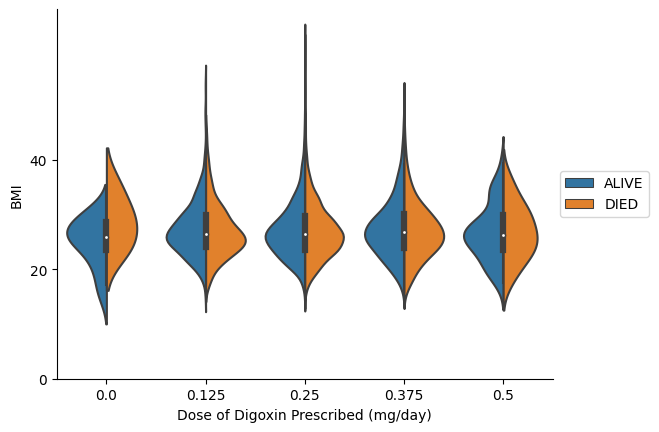

In [20]:
#Plot 2 Violin Plot of BMI by Digoxin Dose Split by Death Status
matplotlib.pyplot.figure()
plot3_1 = seaborn.violinplot(data = dfcleanedfinal, x = 'DIGDOSE', y = 'BMI', hue = 'DEATH_RECODE', split = 'True', order = dosesubset)
plot3_1.set(xlabel = 'Dose of Digoxin Prescribed (mg/day)', ylabel = 'BMI')
plot3_1.set_yticks(list(range(0, 41, 20)))
plot3_1.legend(loc = 'center left', bbox_to_anchor = (1, 0.5)).set_title('')
seaborn.despine()
matplotlib.pyplot.savefig("/content/figures/plot2.pdf", bbox_inches = 'tight')

##**Statistical Analysis**

In [ ]:
#DO NOT DO NITESH SAID SO

##**Publication on GitHub BEFORE RUNNING THIS MAKE SURE TO DOWNLOAD/UPLOAD .IPYNB**

In [ ]:
%%bash
git pull origin main
git add -A
git commit -m "Committed Files:"
git push -u origin main

#**Rubric (10 points)**

**1 points**

The copy of this notebook contains some comments annotating the steps of the analysis performed.

<font color='blue'>Grader comments: None</font>

---

**2 points**

The original DIG Data was imported as a Pandas DataFrame, NaN values were cleaned in some manner, and some outliers were removed.

<font color='blue'>Grader comments: None</font>

---

**2 points**

At least two publication ready plots were made that demonstrate usage of both customization via addition arguments and via Matplotlib Axes.

<font color='blue'>Grader comments: None</font>

---
**2 points** DO NOT DO THIS. **NITESH SAID SO**

One of the following biostatistical analyses were peformed:
*   Calculation of Joint, Marginal, and Conditional Probabilities in which the Probability matrix is exported as a .csv file.
*   Calculation of Sensitivity and Specificity in which a table of confusion matrix metrics was exported as a .csv file.

<font color='blue'>Grader comments: None</font>

---
**1 point**

The entire analysis was uploaded to GitHub with a structure akin to the diagram in the Instructions section.

<font color='blue'>Grader comments: None</font>

---
**1 point**

There is a README file in every directory describing all files and subdirectories with at least a short description.

<font color='blue'>Grader comments: None</font>

---
**1 point**

The public GitHub repository contains the notebook's analysis exported as an .ipynb file.

<font color='blue'>Grader comments: None</font>